In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [83]:
house_price=pd.read_csv('./data/houseprice.csv')
house_price.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [84]:
total = house_price.isnull().sum()*100/house_price.shape[0]
total=total>50
total_info=house_price.columns[total]
total_info

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [85]:
house_price = house_price.drop([ 'Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)
house_price = house_price.dropna()

In [86]:
df_cat = house_price[house_price.select_dtypes(include = ["object"]).columns]
df_cat = pd.get_dummies(df_cat)
df_cat

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [87]:
df_num = house_price[house_price.select_dtypes(exclude = ["object"]).columns]
df_all = pd.concat([df_cat,df_num],axis=1)

In [88]:
from sklearn import linear_model
Y = df_all['SalePrice']
X = df_all[['OverallQual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','KitchenQual_Ex','Foundation_PConc','Fireplaces','ExterQual_Gd','ExterQual_Ex','HeatingQC_Ex','Neighborhood_NridgHt']]
model = linear_model.LinearRegression().fit(X, Y)
print('Değişkenler:', model.coef_)
print('Sabit Değer:', model.intercept_)

Değişkenler: [ 1.42828972e+04  4.70986926e+01  1.41419248e+04  8.83877848e+00
  9.42350694e+00  9.61273951e+00 -3.37679625e+03 -2.51253014e+01
  2.57015705e+02  2.30080339e+02  3.45350811e+04  6.31102787e+01
  1.02738638e+04  5.80183566e+03  3.36489247e+04  5.56293157e+03
  1.65321911e+04]
Sabit Değer: -1002368.0558429501


In [89]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     244.1
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:06:40   Log-Likelihood:                -13081.
No. Observations:                1094   AIC:                         2.620e+04
Df Residuals:                    1076   BIC:                         2.629e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.002e+06   1.78e+05     -5.645      0.000   -1.35e+06   -6.54e+05
OverallQual           1.428e+04   1608.838      8.878      0.000    1.11e+04    1.74e+04
GrLivArea               47.0987      5.037      9.350      0.000      37.215      56.982
GarageCars            1.414e+04   3556.207      3.977      0.000    7164.039    2.11e+04
GarageArea               8.8388     11.801      0.749      0.454     -14.316      31.994
TotalBsmtSF              9.4235      7.359      1.281      0.201      -5.015      23.862
1stFlrSF                 9.6127      7.845      1.225      0.221      -5.781      25.006
FullBath             -3376.7962   3231.485     -1.045      0.296   -9717.523    2963.931
TotRmsAbvGrd           -25.1253   1357.395     -0.019      0.985   -2688.567    2638.316
YearBuilt              257.0157     63.278      4.062      0.000     132.853     381.179
YearRemodAdd           230.0803     81.654      2.818      0.005      69.861     390.300
KitchenQual_Ex        3.454e+04   5553.578      6.219      0.000    2.36e+04    4.54e+04
Foundation_PConc        63.1103   3752.606      0.017      0.987   -7300.144    7426.365
Fireplaces            1.027e+04   2198.848      4.672      0.000    5959.348    1.46e+04
ExterQual_Gd          5801.8357   3942.141      1.472      0.141   -1933.320    1.35e+04
ExterQual_Ex          3.365e+04   8654.041      3.888      0.000    1.67e+04    5.06e+04
HeatingQC_Ex          5562.9316   3038.655      1.831      0.067    -399.430    1.15e+04
Neighborhood_NridgHt  1.653e+04   5467.357      3.024      0.003    5804.301    2.73e+04
==============================================================================
Omnibus:                      452.834   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53093.576
Skew:                          -0.878   Prob(JB):                         0.00
Kurtosis:                      37.083   Cond. No.                     5.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 1. Assumption one: linearity of the model in the coefficient

In [94]:
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)
tahmin = lrm.predict(X)

ValueError: x and y must be the same size

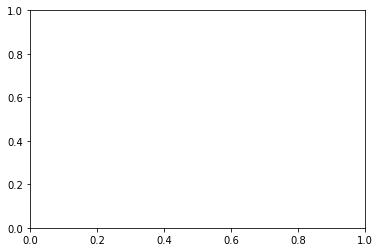

In [96]:
plt.scatter(X, tahmin)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()